In [550]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

filepath_source_all = Path("data/processed/disaster/disaster-all.csv")
filepath_pop_global = Path("data/processed/population/population-global.csv")
filepath_pop_region = Path("data/processed/population/population-region.csv")
filepath_pop_country = Path("data/processed/population/population-country.csv")

pop_global_df = pd.read_csv(filepath_pop_global, sep=';')
pop_regions_df = pd.read_csv(filepath_pop_region, sep=';')
pop_country_df = pd.read_csv(filepath_pop_country, sep=';')

dis_all = pd.read_csv(filepath_source_all)
dis_global_cols = ["year", "type", "subtype", "deaths"]
dis_global = dis_all[dis_global_cols]
dis_all_df = dis_all.copy()

# Data Exploration

In [551]:
print(dis_global.head(8))
print(dis_global.shape)

   year                 type           subtype     deaths
0  1900              Drought           Drought    11000.0
1  1900              Drought           Drought  1250000.0
2  1902           Earthquake   Ground movement     2000.0
3  1902    Volcanic activity          Ash fall     1000.0
4  1902    Volcanic activity          Ash fall     6000.0
5  1903  Mass movement (dry)          Rockfall       76.0
6  1903    Volcanic activity          Ash fall       17.0
7  1904                Storm  Tropical cyclone        0.0
(14871, 4)


We remove White-Spaces from type as well as subtype for more convenience

In [552]:
dis_global["type"] = dis_global["type"].apply(lambda x: x.replace(" ", "_") if x[-1] != ' ' else x.replace(" ", "_"))
dis_global['subtype'].replace(" ", "_", inplace=True, regex=True)
dis_global["type"] = dis_global["type"].apply(lambda x: x.rstrip("_"))

/var/folders/hc/r3nrs79s3bd59z2kkrc_kmrm0000gn/T/ipykernel_48175/3274089006.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_global["type"] = dis_global["type"].apply(lambda x: x.replace(" ", "_") if x[-1] != ' ' else x.replace(" ", "_"))
/var/folders/hc/r3nrs79s3bd59z2kkrc_kmrm0000gn/T/ipykernel_48175/3274089006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dis_global['subtype'].replace(" ", "_", inplace=True, regex=True)
/var/folders/hc/r3nrs79s3bd59z2kkrc_kmrm0000gn/T/ipykernel_48175/3274089006.py:3: SettingWithCopyWarning: 
A value is trying to b

### Feature understanding
How often do the various types of natural disaster occur ?

In [553]:
print(dis_global["type"].value_counts())

Flood                    5744
Storm                    4582
Earthquake               1579
Drought                   792
Landslide                 792
Extreme_temperature       607
Wildfire                  453
Volcanic_activity         270
Mass_movement_(dry)        48
Glacial_lake_outburst       3
Fog                         1
Name: type, dtype: int64


How often do the various types of natural disaster occur?

In [554]:
print(dis_global.subtype.value_counts())

Riverine_flood                      2655
Tropical_cyclone                    2464
Uncategorized_Flood                 2191
Ground_movement                     1519
Convective_storm                    1156
Uncategorized_Storm                  814
Flash_flood                          813
Drought                              792
Landslide                            583
Forest_fire                          313
Cold_wave                            307
Ash_fall                             248
Heat_wave                            223
Extra-tropical_storm                 148
Avalanche                            121
Land_fire_(Brush,_Bush,_Pasture)      92
Coastal_flood                         85
Severe_winter_conditions              77
Mudslide                              76
Tsunami                               57
Rockfall                              12
Lava_flow                              9
Pyroclastic_flow_                      4
Uncategorized_Earthquake               3
Subsidence      

## Deal with missing values for attribute subtype for our selected disaster types

In [555]:
dis_global.loc[dis_global["type"] == "Drought", "subtype"] = dis_global.loc[dis_global["type"] == "Drought", "subtype"].fillna("Drought")

For all other types, we unfortunately can not guess the subtype. Therefore, we assign a custom label “Uncategorized” + the type of the disaster for each missing subtype
We do not need to do this for disasters of type extreme temperature, since subtypes for all observations are specified

In [556]:
dis_global.loc[dis_global["type"] == "Earthquake", "subtype"] = dis_global.loc[dis_global["type"] == "Earthquake", "subtype"].fillna("Uncategorized_Earthquake")
dis_global.loc[dis_global["type"] == "Storm", "subtype"] = dis_global.loc[dis_global["type"] == "Storm", "subtype"].fillna("Uncategorized_Storm")
dis_global.loc[dis_global["type"] == "Flood", "subtype"] = dis_global.loc[dis_global["type"] == "Flood", "subtype"].fillna("Uncategorized_Flood")

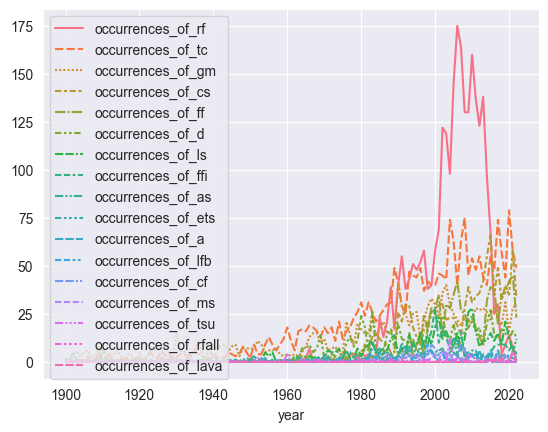

In [557]:
dis_coldwave_freq_per_year = dis_global[dis_global.subtype=="Cold_wave"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_cw"})
dis_heatwave_freq_per_year = dis_global[dis_global.subtype=="Heat_wave"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_hw"})
dis_swc_freq_per_year = dis_global[dis_global.subtype=="Severe_winter_conditions"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_swc"}, inplace=True)

dis_rf_freq_per_year = dis_global[dis_global.subtype=="Riverine_flood"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_rf"})
dis_tc_freq_per_year = dis_global[dis_global.subtype=="Tropical_cyclone"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_tc"})
dis_gm_freq_per_year = dis_global[dis_global.subtype=="Ground_movement"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_gm"})

dis_cs_freq_per_year = dis_global[dis_global.subtype=="Convective_storm"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_cs"})
dis_ff_freq_per_year = dis_global[dis_global.subtype=="Flash_flood"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_ff"})
dis_d_freq_per_year = dis_global[dis_global.subtype=="Drought"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_d"})

dis_ls_freq_per_year = dis_global[dis_global.subtype=="Landslide"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_ls"})
dis_ffi_freq_per_year = dis_global[dis_global.subtype=="Forest_fire"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_ffi"})
dis_as_freq_per_year = dis_global[dis_global.subtype=="Ash_fall"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_as"})

dis_ets_freq_per_year = dis_global[dis_global.subtype=="Extra_tropical_storm"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_ets"})
dis_a_freq_per_year = dis_global[dis_global.subtype=="Avalanche"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_a"})
dis_lfb_freq_per_year = dis_global[dis_global.subtype=="Land_fire_(Brush,_Bush,_Pasture)"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_lfb"})

dis_cf_freq_per_year = dis_global[dis_global.subtype=="Coastal_flood"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_cf"})
dis_ms_freq_per_year = dis_global[dis_global.subtype=="Mudslide"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_ms"})
dis_tsu_freq_per_year = dis_global[dis_global.subtype=="Tsunami"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_tsu"})

dis_rfall_freq_per_year = dis_global[dis_global.subtype=="Rockfall"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_rfall"})
dis_lava_freq_per_year = dis_global[dis_global.subtype=="Lava_flow"].groupby('year').count().drop(["type", "deaths"], axis=1).rename(columns={"subtype": "occurrences_of_lava"})

list_temp = [dis_rf_freq_per_year, dis_tc_freq_per_year, dis_gm_freq_per_year, dis_cs_freq_per_year, dis_ff_freq_per_year,            dis_d_freq_per_year, dis_ls_freq_per_year, dis_ffi_freq_per_year, dis_as_freq_per_year, dis_ets_freq_per_year,            dis_a_freq_per_year, dis_lfb_freq_per_year, dis_cf_freq_per_year, dis_ms_freq_per_year, dis_tsu_freq_per_year,            dis_rfall_freq_per_year, dis_lava_freq_per_year]

dis_freq_per_year_per_subtype = pd.concat(list_temp, axis=1).fillna(0)
sns.lineplot(data=dis_freq_per_year_per_subtype)
plt.legend(loc='upper left')
plt.show()

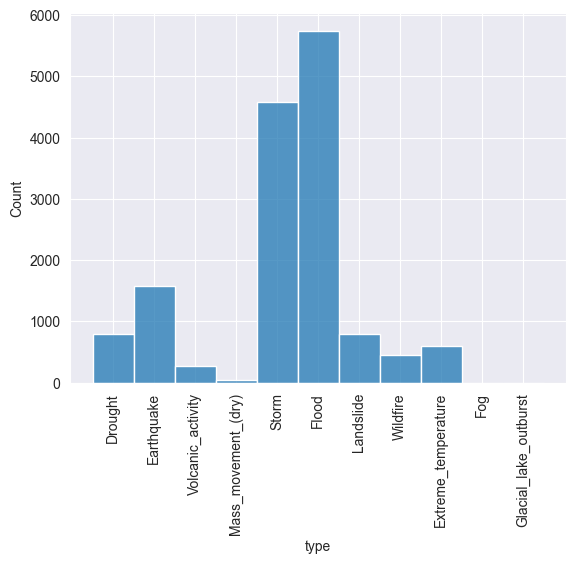

In [558]:
hist = sns.histplot(data=dis_global, x="type")
hist.tick_params(axis='x', rotation=90)
plt.show()
# TODO SORTIEREN

Storms and Floods occur by far the most often while disasters like droughts, earthquakes occur fewer times. The other types of disasters are very rare with only 3 recorded observations of glacial lake outbursts. Living next to the water seems to be dangerous!

Which types of natural disasters cause the most deaths ?

In [559]:
dis_deaths_by_type = dis_global.groupby(["type"])
dis_deaths_by_type = dis_deaths_by_type.sum(numeric_only=True).drop("year", axis=1)
dis_deaths_by_type.sort_values(by="deaths",ascending=False)

,deaths
type,
Drought,11733889.0
Flood,7002992.0
Earthquake,2343912.0
Storm,1403609.0
Extreme_temperature,194056.0
Volcanic_activity,86893.0
Landslide,67477.0
Wildfire,4653.0
Mass_movement_(dry),4644.0


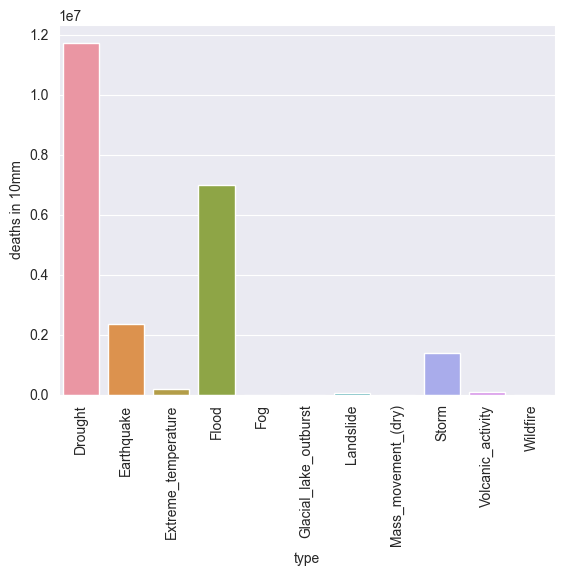

In [560]:
barplot = sns.barplot(data=dis_deaths_by_type.reset_index(), x="type", y="deaths")
barplot.tick_params(axis='x', rotation=90)
barplot.set_ylabel("deaths in 10mm")
plt.show()

As expected the cumulative deaths by flood are high with around 7 million people dying in the last 100 years.
The most significant insight here is that droughts have the highest death toll of all disasters with almost 11 mio people dying in the same timeframe. This is remarkable since droughts were only the fifth most common disaster. Storms, which occurred almost als often as floods have a relatively low death toll and are even superseded by the number of people dying from earthquakes.

The lethality of droughts is the most surprising or in this case shocking point.
More people dyed from droughts, probably following week long starvation, than from all other disasters combined.
There is one caveat though: Droughts are not necessarily the result of natural events but rather can be and have been caused by political failure or even have been weaponized by states.

We can also indentify the following types as the main contributors to human deaths by natural disasters:

- Drought
- Flood
- Earthquake
- Storm
- Extreme temperature

In addition to the most lethal disasters, we also choose to include Extreme temperature into our closer examination, since we suspect it to be related to the rising global temperature.
We will take a closer look at those types of disasters in the following.

So lets see what the most lethal disasters of the last one hundred years have been

In [561]:
dis_global.sort_values(by="deaths", ascending = False).drop("subtype", axis=1).head(10)

,year,type,deaths
95,1931,Flood,3700000.0
81,1928,Drought,3000000.0
272,1959,Flood,2000000.0
137,1943,Drought,1900000.0
354,1965,Drought,1500000.0
130,1942,Drought,1500000.0
1,1900,Drought,1250000.0
849,1921,Drought,1200000.0
123,1939,Flood,500000.0
48,1920,Drought,500000.0


The 10 most lethal disasters from the last 100 years have exclusively been floods and droughts.
The number one spot is a flood which happened 1931 in China and is known as the deadliest natural disaster of all time. 0.1%

## How did natural disasters changed over time?

### Frequency

How did the frequency of natural disasters change over time ?

In [562]:
dis_freq_per_year = dis_global.groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_freq_per_year.rename(columns={'type':'recorded disasters'}, inplace=True)

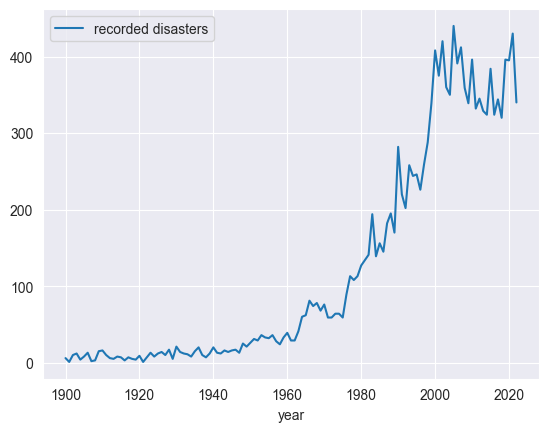

In [563]:
sns.lineplot(data = dis_freq_per_year)
plt.show()

We can clearly see that the number of recorded disasters skyrocketed over the last 100 years. This is most likely not because there are this much more disasters happening (which affected people), but rather due to states or other institutions increasing their monitoring and taking recording of natural disasters seriously.

### Death toll

         deaths
year           
1900  1267470.0
1901       18.0
1902    48438.0
1903     7136.0
1904      152.0
1905    20987.0
1906    33657.0
1907    13200.0


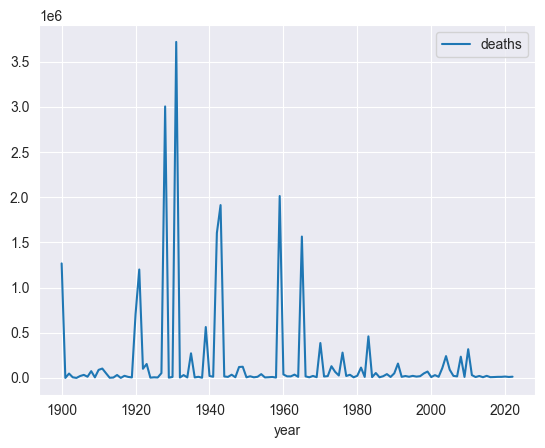

In [564]:
dis_deaths_per_year = dis_global.groupby('year').sum(numeric_only=True)
print(dis_deaths_per_year.head(8))

sns.lineplot(data = dis_deaths_per_year)
plt.show()

This is unexpected. We saw that the frequency of recorded disasters increased strongly over the past 100 years.
But number of people dying from natural disasters certainly has not.
We can also see that those are not linear trends. In certain periods of time, disasters seem to occur that have a dramatically high death toll like in the 1920s-1940s and the 1960s. Other periods like the 1950s have almost no recorded deaths (compared to the significant ones). After that 1960s the recorded deaths per year never came close to that, with only minor spikes occurring in the 2000s.

The 1920s-1940s can maybe be explained due to historic events and their consequences, like the two world wars, the great depression and political systems collapsing all around the world.

For the major disasters happening in the 1960s it is not that obvious to come up with a causal reasoning.
This requires further research.

It is safe to say that humanity as a whole has improved significantly in preventing disasters with a death toll in the millions.

When comparing the deaths by disasters on a normal scale, to see trends, it might be a good idea to exclude those major disasters.

To express how severe the major disasters were in relation to the other disaster, we illustrate them in a boxplot.
All the upper outliers are disasters that were so deadly, that the year they occurred is defined by it with all other disasters paling in comparison. That is why some years are extreme outliers.

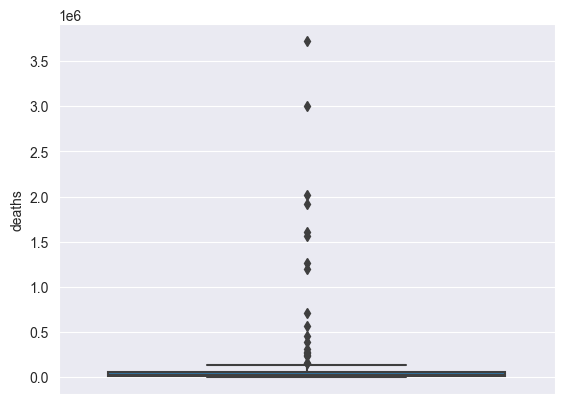

In [565]:
sns.boxplot( y=dis_deaths_per_year["deaths"] )
plt.show()

Disasters tend to show up periodically but not annually, so maybe it makes more sense for a boxplot to visualize the data grouped by decades, not years.
We exclude the 2020 decade since our data only contains disasters that happened before 2023. It therefore makes not much sense to include them in the analysis where wo compare absolute occurrences or the sum of all deaths.

### Decades

#### Frequency

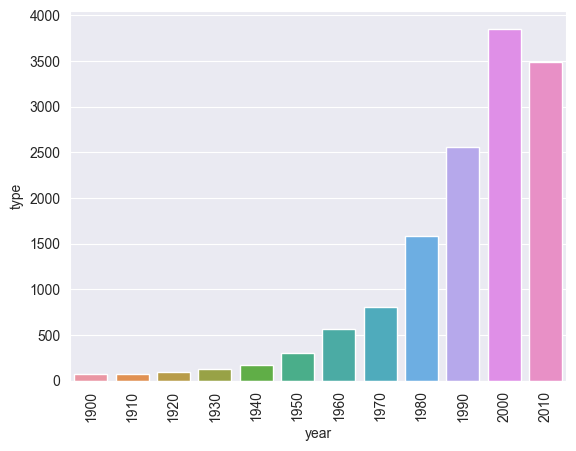

In [566]:
dis_freq_per_decade = dis_global.copy()
dis_freq_per_decade['year'] = dis_freq_per_decade['year'] - dis_freq_per_decade['year'] % 10
dis_freq_per_decade = dis_freq_per_decade.groupby('year')["type"].count()
dis_freq_per_decade.drop([2020], axis=0, inplace=True)
barplot = sns.barplot(data=dis_freq_per_decade.reset_index(), x="year", y="type")
barplot.tick_params(axis='x', rotation=90)
plt.show()

#### Death toll

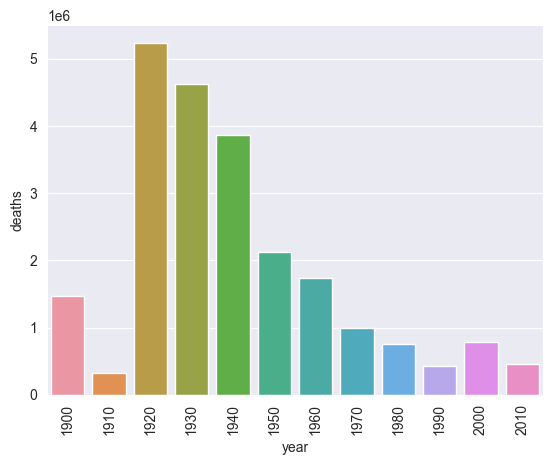

In [567]:
dis_deaths_per_decade = dis_global.copy()
dis_deaths_per_decade['year'] = dis_deaths_per_decade['year'] - dis_deaths_per_decade['year'] % 10
dis_deaths_per_decade = dis_deaths_per_decade.groupby('year').sum(numeric_only = True)
dis_deaths_per_decade.drop([2020], axis=0, inplace=True)
barplot = sns.barplot(data=dis_deaths_per_decade.reset_index(), x="year", y="deaths")
barplot.tick_params(axis='x', rotation=90)
plt.show()

By grouping the data by decades we should now be able to create a reasonable looking boxplot

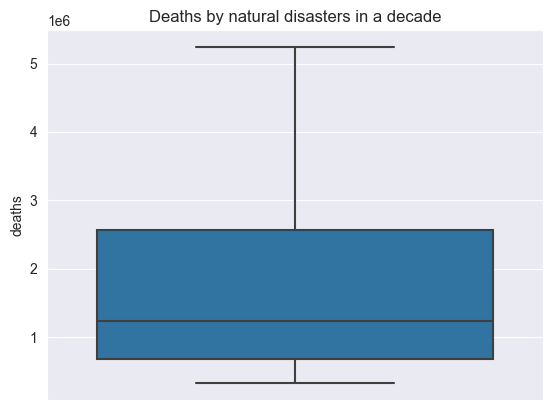

In [568]:
sns.boxplot( y=dis_deaths_per_decade["deaths"]).set(title='Deaths by natural disasters in a decade')
plt.show()

Are there differences in the number of recorded incidents and deaths for different types of disasters ?

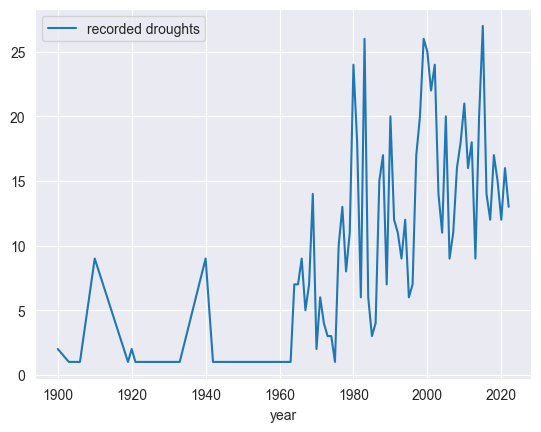

In [569]:
dis_droughts_per_year = dis_global[dis_global.type=="Drought"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_droughts_per_year.rename(columns={'type':'recorded droughts'}, inplace=True)
sns.lineplot(data = dis_droughts_per_year)
plt.show()

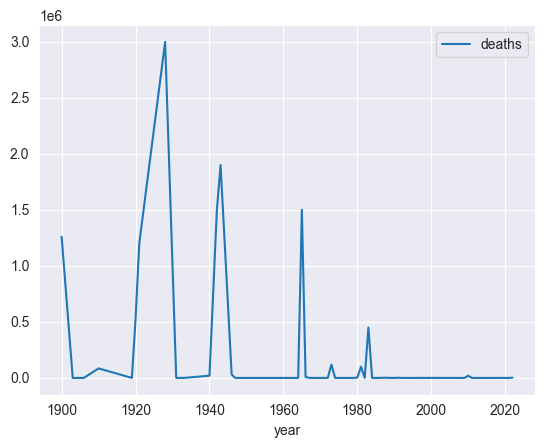

In [570]:
dis_deaths_by_droughts_per_year = dis_global[dis_global.type=="Drought"].groupby('year').sum(numeric_only=True)
sns.lineplot(data = dis_deaths_by_droughts_per_year)
plt.show()

The number of recorded droughts has increases but the number of recorded deaths has decreased. In 40 years no drought has really caused a significant amount of deaths.
In the 1920s and the early 1940s extremely lethal droughts occurred. This is also what we saw previously.

#### Floods

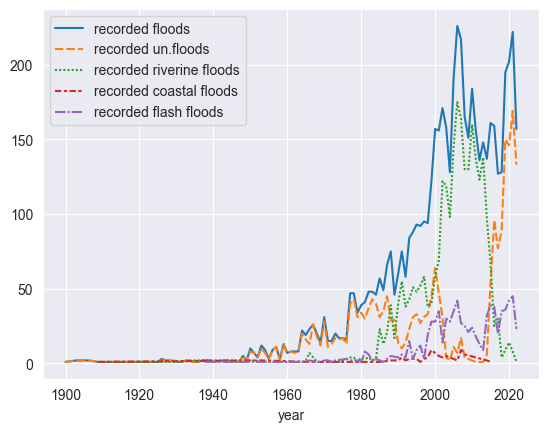

In [571]:
dis_floods_per_year = dis_global[dis_global.type=="Flood"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_floods_uf_per_year = dis_global[dis_global.subtype=="Uncategorized_Flood"].groupby('year').count().drop(["type", "deaths"], axis=1)
dis_floods_rf_per_year = dis_global[dis_global.subtype=="Riverine_flood"].groupby('year').count().drop(["type", "deaths"], axis=1)
dis_floods_cf_per_year = dis_global[dis_global.subtype=="Coastal_flood"].groupby('year').count().drop(["type", "deaths"], axis=1)
dis_floods_ff_per_year = dis_global[dis_global.subtype=="Flash_flood"].groupby('year').count().drop(["type", "deaths"], axis=1)
dis_floods_per_year.rename(columns={'type':'recorded floods'}, inplace=True)
dis_floods_uf_per_year.rename(columns={'subtype':'recorded un.floods'}, inplace=True)
dis_floods_rf_per_year.rename(columns={'subtype':'recorded riverine floods'}, inplace=True)
dis_floods_cf_per_year.rename(columns={'subtype':'recorded coastal floods'}, inplace=True)
dis_floods_ff_per_year.rename(columns={'subtype':'recorded flash floods'}, inplace=True)
dis_floods_freq = [dis_floods_per_year, dis_floods_uf_per_year, dis_floods_rf_per_year, dis_floods_cf_per_year, dis_floods_ff_per_year]
sns.lineplot(data = pd.concat(dis_floods_freq, axis=1))
plt.show()

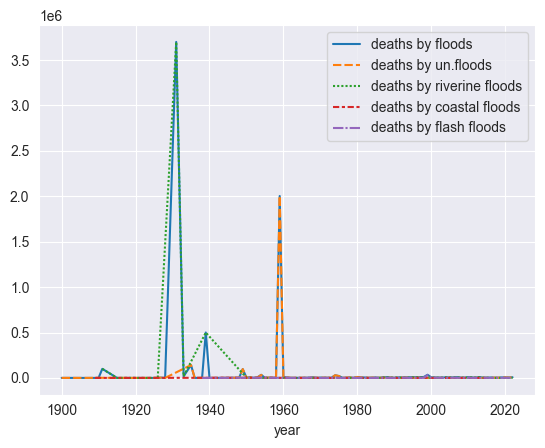

In [572]:
dis_deaths_by_floods_per_year = dis_global[dis_global.type=="Flood"].groupby('year').sum(numeric_only=True)
dis_deaths_by_floods_uf_per_year = dis_global[dis_global.subtype=="Uncategorized_Flood"].groupby('year').sum(numeric_only=True)
dis_deaths_by_floods_rf_per_year = dis_global[dis_global.subtype=="Riverine_flood"].groupby('year').sum(numeric_only=True)
dis_deaths_by_floods_cf_per_year = dis_global[dis_global.subtype=="Coastal_flood"].groupby('year').sum(numeric_only=True)
dis_deaths_by_floods_ff_per_year = dis_global[dis_global.subtype=="Flash_flood"].groupby('year').sum(numeric_only=True)

dis_deaths_by_floods_per_year.rename(columns={'deaths':'deaths by floods'}, inplace=True)
dis_deaths_by_floods_uf_per_year.rename(columns={'deaths':'deaths by un.floods'}, inplace=True)
dis_deaths_by_floods_rf_per_year.rename(columns={'deaths':'deaths by riverine floods'}, inplace=True)
dis_deaths_by_floods_cf_per_year.rename(columns={'deaths':'deaths by coastal floods'}, inplace=True)
dis_deaths_by_floods_ff_per_year.rename(columns={'deaths':'deaths by flash floods'}, inplace=True)

dis_floods_deaths = [dis_deaths_by_floods_per_year, dis_deaths_by_floods_uf_per_year, dis_deaths_by_floods_rf_per_year, dis_deaths_by_floods_cf_per_year, dis_deaths_by_floods_ff_per_year]

sns.lineplot(data = pd.concat(dis_floods_deaths, axis = 1))
plt.show()

In [573]:
print(dis_deaths_by_floods_uf_per_year.head())

      deaths by un.floods
year                     
1900                300.0
1903                250.0
1906                  6.0
1910               1379.0
1920                  0.0


The number of recorded incidents of floods are increasing, like for the other types or recorded disasters in general. We can see that the most lethal floods have occurred in the early 1930s (e.g. China-Flood) as well as the early 1960s.
Unlike the other types of disaster, floods do not cause a high number of humans lives in other periods, with the annual death toll being negligible for other time spans. Since the 1960s no flood has ever caused a high number of human casualties again. This might be due to more modern ways of predicting floods earlier as well as people being cautious to live in areas where floods are likely and lethal.

#### Earthquakes

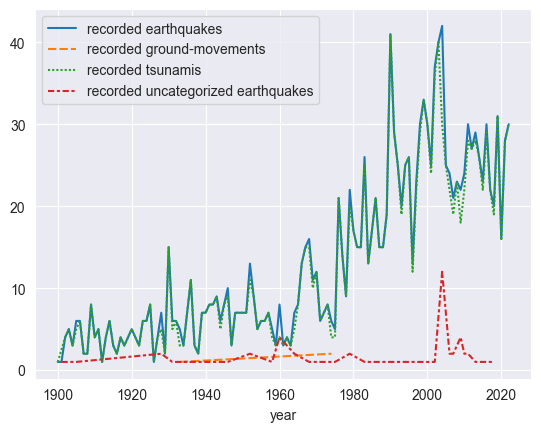

In [574]:
dis_earthquakes_per_year = dis_global[dis_global.type=="Earthquake"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_earthquakes_gm_per_year = dis_global[dis_global.subtype=="Uncategorized_Earthquake"].groupby('year').count().drop(["type", "deaths"], axis=1)
dis_earthquakes_ts_per_year = dis_global[dis_global.subtype=="Ground_movement"].groupby('year').count().drop(["type", "deaths"], axis=1)
dis_earthquakes_ue_per_year = dis_global[dis_global.subtype=="Tsunami"].groupby('year').count().drop(["type", "deaths"], axis=1)

dis_earthquakes_per_year.rename(columns={'type':'recorded earthquakes'}, inplace=True)
dis_earthquakes_gm_per_year.rename(columns={'subtype':'recorded ground-movements'}, inplace=True)
dis_earthquakes_ts_per_year.rename(columns={'subtype':'recorded tsunamis'}, inplace=True)
dis_earthquakes_ue_per_year.rename(columns={'subtype':'recorded uncategorized earthquakes'}, inplace=True)

dis_earthquakes_freq = [dis_earthquakes_per_year, dis_earthquakes_gm_per_year, dis_earthquakes_ts_per_year, dis_earthquakes_ue_per_year]
sns.lineplot(data = pd.concat(dis_earthquakes_freq, axis=1))
plt.show()

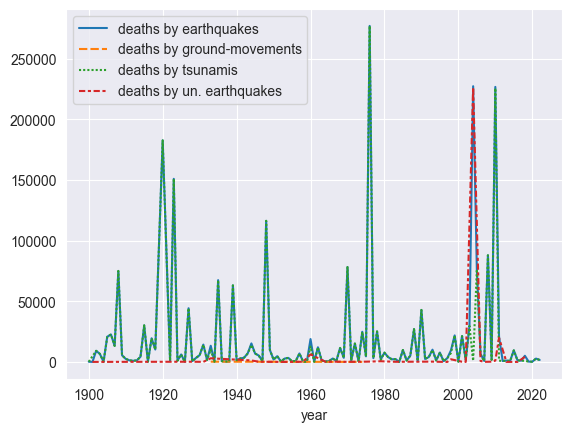

In [575]:
dis_deaths_by_earthquakes_per_year = dis_global[dis_global.type=="Earthquake"].groupby('year').sum(numeric_only=True)
dis_deaths_by_earthquakes_gm_per_year = dis_global[dis_global.subtype=="Uncategorized_Earthquake"].groupby('year').sum(numeric_only=True)
dis_deaths_by_earthquakes_ts_per_year = dis_global[dis_global.subtype=="Ground_movement"].groupby('year').sum(numeric_only=True)
dis_deaths_by_earthquakes_ue_per_year = dis_global[dis_global.subtype=="Tsunami"].groupby('year').sum(numeric_only=True)

dis_deaths_by_earthquakes_per_year.rename(columns={'deaths':'deaths by earthquakes'}, inplace=True)
dis_deaths_by_earthquakes_gm_per_year.rename(columns={'deaths':'deaths by ground-movements'}, inplace=True)
dis_deaths_by_earthquakes_ts_per_year.rename(columns={'deaths':'deaths by tsunamis'}, inplace=True)
dis_deaths_by_earthquakes_ue_per_year.rename(columns={'deaths':'deaths by un. earthquakes'}, inplace=True)

dis_earthquakes_deaths = [dis_deaths_by_earthquakes_per_year, dis_deaths_by_earthquakes_gm_per_year, dis_deaths_by_earthquakes_ts_per_year, dis_deaths_by_earthquakes_ue_per_year]

sns.lineplot(data = pd.concat(dis_earthquakes_deaths, axis=1))
plt.show()

The frequency of all recorded disaster has drastically increased over the last 100 years, but earthquakes seem to be the one disaster type people have been somewhat reliably tracking even in the first part of the 19th century. It still increased, but not as drastically as the other ones.
The recorded deaths per year spiked again in the 1920s, like almost all other types of disasters but also in the late 1970s and the 2000s.
Here we can see that the spikes in deaths we saw earlier in the 2000s probably are caused by those earthquakes. A reason might be that droughts and floods are easier to prevent with modern technology or global aid programs, while earthquakes are more difficult to prevent even in our modern world. They are still nowhere nearly as deadly as the floods and droughts 50 years earlier have been.

#### Extreme temperature

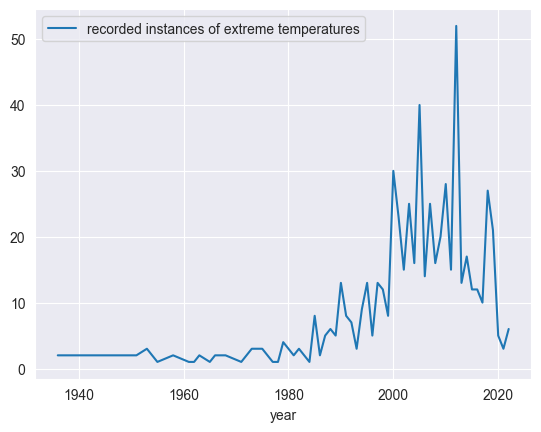

In [576]:
dis_extemp_freq_per_year = dis_global[dis_global.type=="Extreme_temperature"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_extemp_freq_per_year.rename(columns={'type':'recorded instances of extreme temperatures'}, inplace=True)
sns.lineplot(data = dis_extemp_freq_per_year)
plt.show()

We can observe that like most other disasters, extreme weather as a natural disaster was not even recorded prior to the 1940s. Furthermore, occurrences in a decently sized annual number have only started to appear since the start of the 1980s.

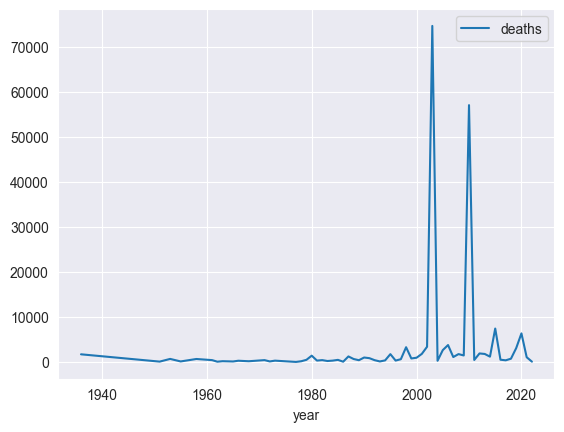

In [577]:
dis_extemp_deaths_per_year = dis_global[dis_global.type=="Extreme_temperature"].groupby('year').sum(numeric_only=True)
dis_extemp_deaths_per_year.head()
dis_extemp_deaths_per_year.rename(columns={'type':'recorded extreme temperatures'}, inplace=True)
sns.lineplot(data = dis_extemp_deaths_per_year)
plt.show()

The plot shows that almost nobody died as a result of extreme weather conditions prior to the year 2000. While the deaths increased over time from 2000 until now, 2 years with an exorbitant death toll stand out in particular.

In [578]:
dis_extemp_deaths_per_year.sort_values(by="deaths", ascending = False).head(3)

,deaths
year,
2003,74698.0
2010,57088.0
2015,7425.0


Upon closer inspection we see that the years 2003 and 2010 have a death toll that is bigger than all other by orders of magnitude. I suspect that these high numbers of deaths were caused by heat waves, since they are by far the most deadly.

In [579]:
dis_extemp_deaths = dis_global[dis_global.subtype=="Heat_wave"]
dis_extemp_deaths.sort_values(by="deaths", ascending = False).head(3)

,year,type,subtype,deaths
10405,2010,Extreme_temperature,Heat_wave,55736.0
7566,2003,Extreme_temperature,Heat_wave,20089.0
7563,2003,Extreme_temperature,Heat_wave,19490.0


As expected, we see that the spikes in deaths in 2010 and 2003 were mainly caused by intense heat waves. The surprise comes with location at the location. This all happened in europe, which was previously almost never had problems with people dying from natural disasters, excluding the time before the 1970s. In 2003 europe saw the hottest summer recorded in Europe since at least 1540.

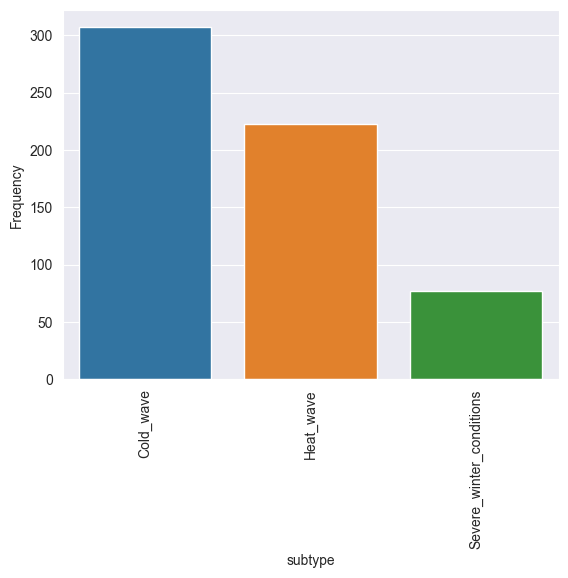

In [580]:
dis_extemp_freq_per_subtype = dis_global[dis_global.type=="Extreme_temperature"].reset_index().drop(columns=['year', 'deaths'], axis=1).groupby('subtype').count()
barplot = sns.barplot(data=dis_extemp_freq_per_subtype.reset_index(), x="subtype", y="type")
barplot.tick_params(axis='x', rotation=90)
barplot.set_ylabel("Frequency")
plt.show()

Cold waves are more common than heat waves but not by much. Recorded instances of severe winter conditions are rare in comparison. Nonetheless, we need to split the observations by subtype if we want to inspect the deaths by heat waves in relationship to rising global temperatures later on.

Number of occurrences of different subtypes of extreme weather conditions over time.

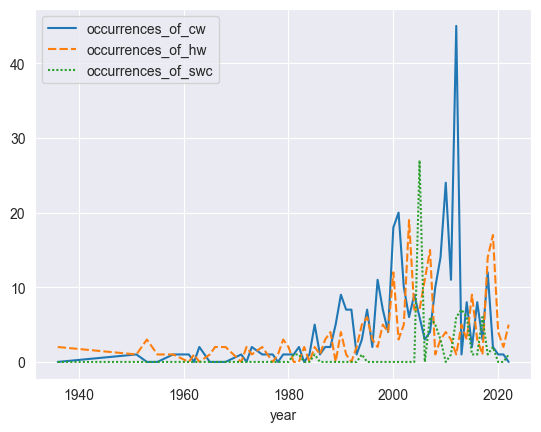

In [581]:
dis_coldwave_freq_per_year = dis_global[dis_global.subtype=="Cold_wave"].groupby('year').size().rename("occurrences_of_cw", inplace=True)
dis_heatwave_freq_per_year = dis_global[dis_global.subtype=="Heat_wave"].groupby('year').size().rename("occurrences_of_hw", inplace=True)
dis_swc_freq_per_year = dis_global[dis_global.subtype=="Severe_winter_conditions"].groupby('year').size().rename("occurrences_of_swc", inplace=True)
dis_freq_per_year_per_subtype = pd.concat([dis_coldwave_freq_per_year, dis_heatwave_freq_per_year, dis_swc_freq_per_year], axis=1).fillna(0)
sns.lineplot(data=dis_freq_per_year_per_subtype)
plt.show()

It is apparent that years with a exceptionally number of occurrences by cold waves are happening since the early 2000s, which can not be said about the other forms of extreme temperature. Spikes in the number of heat waves per year have nonetheless become much more common in the 2000s and beyond.
Like most other disasters, tracking them reliably has only really started in the last 50 years. With extreme weather conditions this is even more extreme, with observations only showing up in decent numbers around the 1990s. Surely extreme weather conditions have happened before in similar numbers but where probably not recorded. This might be due to the nature of these kinds of disasters. An earthquake is much flashier in its effects, than really high temperatures around the country for several days or weeks. 95% of people could be totally fine when a heatwave in vienna is happening for example, with some people even enjoying it. This makes them nonetheless dangerous for a small number of vulnerable people, especially the elderly.

Death toll of different subtypes of extreme weather conditions split by subtypes.

In [582]:
dis_extemp_deaths_per_subtype = dis_global[dis_global.type=="Extreme_temperature"].reset_index().groupby('subtype').sum(numeric_only=True)
dis_extemp_deaths_per_subtype["deaths"].sort_values(ascending = False)

subtype
Heat_wave                   172555.0
Cold_wave                    17765.0
Severe_winter_conditions      3736.0
Name: deaths, dtype: float64

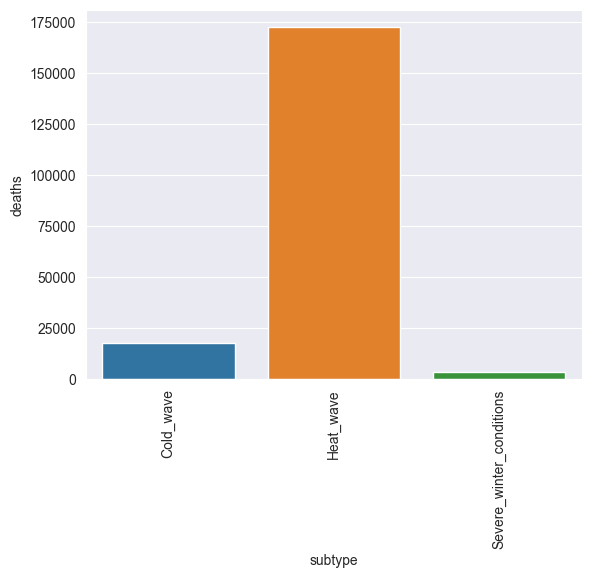

In [583]:
barplot = sns.barplot(data=dis_extemp_deaths_per_subtype.reset_index(), x="subtype", y="deaths")
barplot.tick_params(axis='x', rotation=90)
barplot.set_ylabel("deaths")
plt.show()

According to our data, Heat waves are by far the most dangerous subtype of extreme weather conditions, with over 90% of all deaths by this type of disasters caused by them.

#### Death toll per year over time


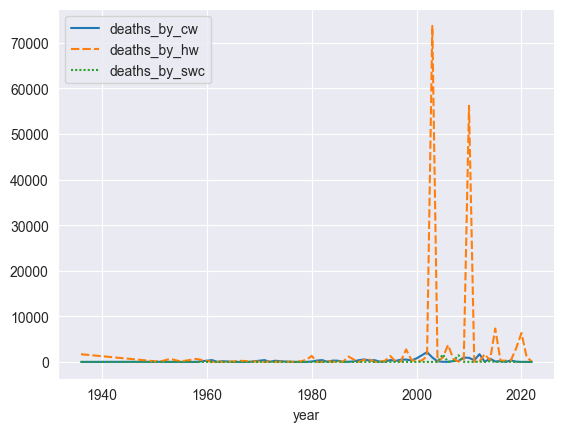

In [584]:
dis_coldwave_deaths_per_year = dis_global[dis_global.subtype=="Cold_wave"].groupby('year').sum(numeric_only=True)
dis_coldwave_deaths_per_year.rename(columns={"deaths":"deaths_by_cw"}, inplace=True)
dis_heatwave_deaths_per_year = dis_global[dis_global.subtype=="Heat_wave"].groupby('year').sum(numeric_only=True)
dis_heatwave_deaths_per_year.rename(columns={"deaths":"deaths_by_hw"}, inplace=True)
dis_swc_deaths_per_year = dis_global[dis_global.subtype=="Severe_winter_conditions"].groupby('year').sum(numeric_only=True)
dis_swc_deaths_per_year.rename(columns={"deaths":"deaths_by_swc"}, inplace=True)
dis_deaths_per_year_per_subtype = pd.concat([dis_coldwave_deaths_per_year, dis_heatwave_deaths_per_year, dis_swc_deaths_per_year], axis=1).fillna(0)
sns.lineplot(data=dis_deaths_per_year_per_subtype)
plt.show()

Since we do not have much data for disasters of type extreme temperature, out graph is distorted. To get a better sense of a trend, let us now group the data by decades. We remove the cumulated data from the present decade since it just started.

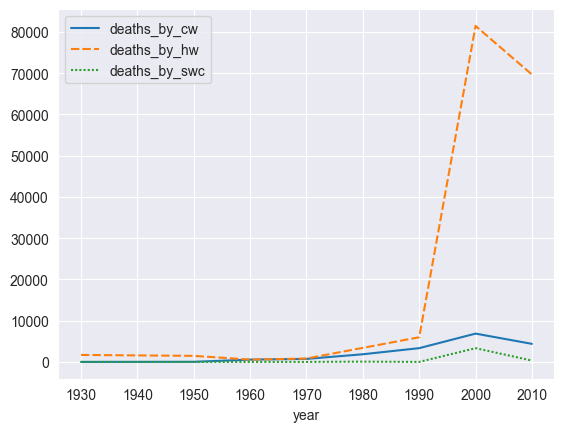

In [585]:
dis_extemp_deaths_per_decade = dis_deaths_per_year_per_subtype.reset_index()
dis_extemp_deaths_per_decade['year'] = dis_extemp_deaths_per_decade['year'] - dis_extemp_deaths_per_decade['year'] % 10
dis_extemp_deaths_per_decade = dis_extemp_deaths_per_decade.groupby('year').sum(numeric_only=True)
dis_extemp_deaths_per_decade.drop([2020], axis=0, inplace=True)
dis_extemp_deaths_per_decade.tail()
sns.lineplot(dis_extemp_deaths_per_decade)
plt.show()

Now we can observe the trend more clearly, the number of deaths by heatwaves has significantly increased since the 1990s. For the two other subtypes, cold waves and severe winter condition, this is can not be said. Their death toll per year mostly stayed the same. Especially for deaths by cold waves, this is odd, since their number increased the most after the turn of the century.

#### Storms

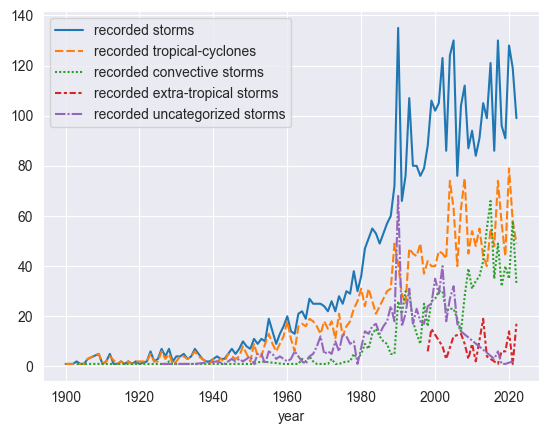

In [586]:
dis_deaths_by_storms_per_year = dis_global[dis_global.type=="Storm"].groupby('year').count().drop(["subtype", "deaths"], axis=1)
dis_deaths_by_storms_tc_per_year = dis_global[dis_global.subtype=="Tropical_cyclone"].groupby('year').count().drop(["type", "deaths"], axis=1)
dis_deaths_by_storms_cs_per_year = dis_global[dis_global.subtype=="Convective_storm"].groupby('year').count().drop(["type", "deaths"], axis=1)
dis_deaths_by_storms_ets_per_year = dis_global[dis_global.subtype=="Extra-tropical_storm"].groupby('year').count().drop(["type", "deaths"], axis=1)
dis_deaths_by_storms_us_per_year = dis_global[dis_global.subtype=="Uncategorized_Storm"].groupby('year').count().drop(["type", "deaths"], axis=1)

dis_deaths_by_storms_per_year.rename(columns={'type':'recorded storms'}, inplace=True)
dis_deaths_by_storms_tc_per_year.rename(columns={'subtype':'recorded tropical-cyclones'}, inplace=True)
dis_deaths_by_storms_cs_per_year.rename(columns={'subtype':'recorded convective storms'}, inplace=True)
dis_deaths_by_storms_ets_per_year.rename(columns={'subtype':'recorded extra-tropical storms'}, inplace=True)
dis_deaths_by_storms_us_per_year.rename(columns={'subtype':'recorded uncategorized storms'}, inplace=True)

dis_storms_deaths = [dis_deaths_by_storms_per_year, dis_deaths_by_storms_tc_per_year, dis_deaths_by_storms_cs_per_year, dis_deaths_by_storms_ets_per_year, dis_deaths_by_storms_us_per_year]

sns.lineplot(data = pd.concat(dis_storms_deaths, axis=1))
plt.show()

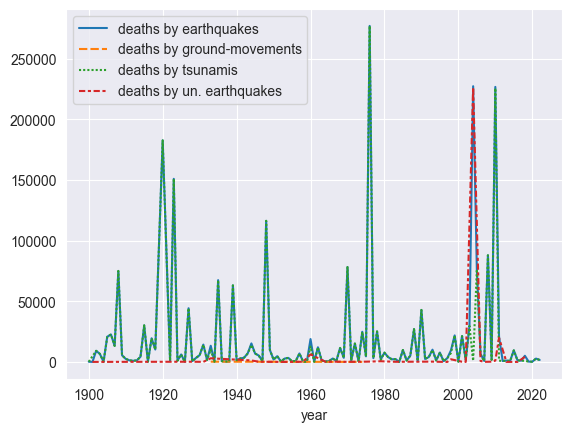

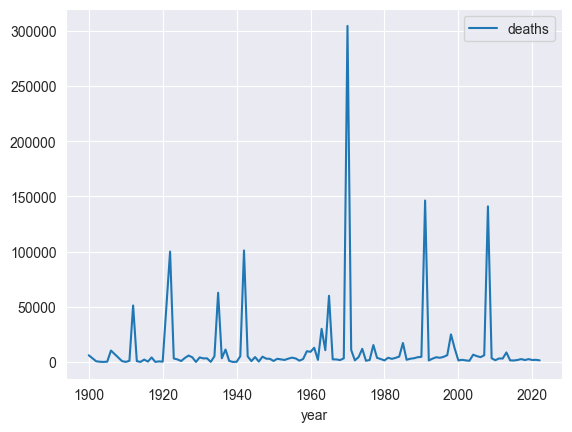

In [587]:
dis_deaths_by_storms_per_year = dis_global[dis_global.type=="Earthquake"].groupby('year').sum(numeric_only=True)
dis_deaths_by_storms_ts_per_year = dis_global[dis_global.subtype=="Uncategorized_Earthquake"].groupby('year').sum(numeric_only=True)
dis_deaths_by_storms_cs_per_year = dis_global[dis_global.subtype=="Ground_movement"].groupby('year').sum(numeric_only=True)
dis_deaths_by_storms_ets_per_year = dis_global[dis_global.subtype=="Tsunami"].groupby('year').sum(numeric_only=True)
dis_deaths_by_storms_us_per_year = dis_global[dis_global.subtype=="Tsunami"].groupby('year').sum(numeric_only=True)

dis_deaths_by_storms_per_year.rename(columns={'deaths':'deaths by storms'}, inplace=True)
dis_deaths_by_storms_ts_per_year.rename(columns={'deaths':'deaths by tropical-cyclones'}, inplace=True)
dis_deaths_by_storms_cs_per_year.rename(columns={'deaths':'deaths by convective storms'}, inplace=True)
dis_deaths_by_storms_ets_per_year.rename(columns={'deaths':'deaths by extra-tropical storms'}, inplace=True)
dis_deaths_by_storms_us_per_year.rename(columns={'deaths':'deaths by uncategorized storms'}, inplace=True)

dis_earthquakes_deaths = [dis_deaths_by_earthquakes_per_year, dis_deaths_by_earthquakes_gm_per_year, dis_deaths_by_earthquakes_ts_per_year, dis_deaths_by_earthquakes_ue_per_year]

sns.lineplot(data = pd.concat(dis_earthquakes_deaths, axis=1))
plt.show()

dis_deaths_by_storms_per_year = dis_global[dis_global.type=="Storm"].groupby('year').sum(numeric_only=True)
sns.lineplot(data = dis_deaths_by_storms_per_year)
plt.show()

Like all disasters, the number of recorded storms has drastically increased over the past 100 years. Noticeable is that the recorded deaths by storms seem to be the most consistent over the years. Looking at the plot we can see that roughly every 20 years storms occurs which cause a great amount of human casualties. Maybe this can be linked to the periodical behaviour of storms such as El Niño.
Significant is also the storm in the 1970s which has by far the highest death toll. Let us take a closer look at this one.

In [588]:
dis_deaths_by_storms_per_year.sort_values(by="deaths", ascending = False).head()

,deaths
year,
1970,304495.0
1991,146297.0
2008,140985.0
1942,101000.0
1922,100000.0


This disaster was a storm named the “1970 Bhola cyclone”, also known as the “Great Cyclone of 1970” and was a tropcial cyclone that hit East-Pakistan (present-day Bangladesh) and parts of India. It killed as much as 3 million people and went down in history as one of the deadliest natural disasters of all time. It was the strongest cyclonic storm of the 1970 North Indian Ocean cyclone season.

## Population
### Global population

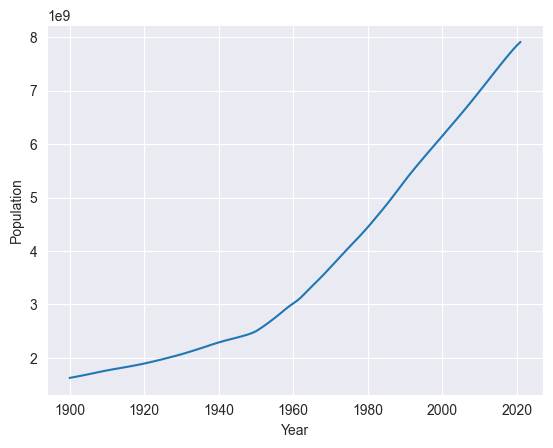

In [589]:
pop_global_df_plot = sns.lineplot(data=pop_global_df, x='year', y='population')
pop_global_df_plot.set_ylabel("Population")
pop_global_df_plot.set_xlabel("Year")
plt.show()

This plot shows the world population from 1900 until 2021. We can observe a significant change in the population growth after WW2 - often referred as the ‘boomer generation’. After that, the population growth did not stagnate until now. Let’s take a look at the population trend in the specified regions.

### Regional population

   region_code region_name  year  population
0          2.0      Africa  1900   138578556
1          2.0      Africa  1901   139018147
2          2.0      Africa  1902   139489077
3          2.0      Africa  1903   139992790
4          2.0      Africa  1904   140510536


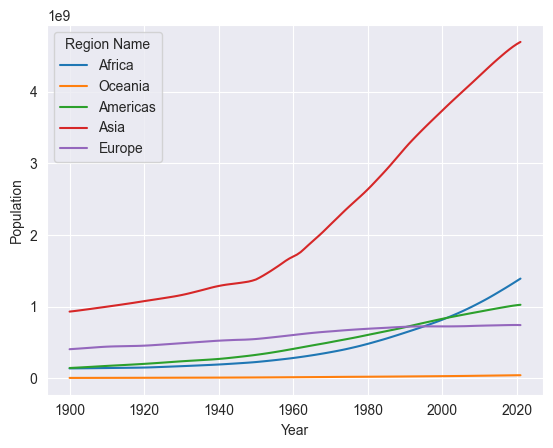

In [590]:
print(pop_regions_df.head(5))
pop_regions_plot = sns.lineplot(data=pop_regions_df, x='year', y='population', estimator=None, hue='region_name')
pop_regions_plot.set_ylabel("Population")
pop_regions_plot.set_xlabel("Year")
pop_regions_plot.get_legend().set_title("Region Name")
plt.show()

The above plot shows the population development of the specified regions. As expected, the population of Asia grew significantly faster, than the population of the other regions. In Europe, the population slightly increased, but with the slowest growing rate. Both America and Africa show an upwards trend since the 1950´s. We will use the population data, to calculate the relative death rate.

In [591]:
dis_all_df['deaths'] = dis_all_df['deaths'].fillna(0)
dis_all_df['deaths'] = dis_all_df['deaths'].astype(int)

#extract rows with recorded deaths
dis_all_with_deaths = dis_all_df[dis_all_df['deaths'] > 0]
print(dis_all_with_deaths['deaths'].describe().astype(int))

count      10459
mean        2184
std        60938
min            1
25%            5
50%           17
75%           54
max      3700000
Name: deaths, dtype: int64


In [592]:
dis_all_with_rel_deaths = pd.merge(dis_all_with_deaths, pop_country_df, how='left', on=['year', 'country_code', 'country_name'])
dis_all_with_rel_deaths['rel_deaths'] = dis_all_with_rel_deaths['deaths']/dis_all_with_rel_deaths['population']
print(dis_all_with_rel_deaths.head())

   year         dis_no country_name country_code                   location  \
0  1900  1900-9002-CPV   Cabo Verde          CPV                Countrywide   
1  1900  1900-9001-IND        India          IND                     Bengal   
2  1902  1902-0012-GTM    Guatemala          GTM  Quezaltenango, San Marcos   
3  1902  1902-0003-GTM    Guatemala          GTM                        NaN   
4  1902  1902-0010-GTM    Guatemala          GTM                        NaN   

         subgroup               type          subtype   deaths  dis_mag_value  \
0  Climatological            Drought          Drought    11000            NaN   
1  Climatological            Drought          Drought  1250000            NaN   
2     Geophysical         Earthquake  Ground movement     2000            8.0   
3     Geophysical  Volcanic activity         Ash fall     1000            NaN   
4     Geophysical  Volcanic activity         Ash fall     6000            NaN   

  dis_mag_scale  start_year  end_year 

### Split dataset into global, regional and country sub-datasets.

In [593]:
#get global dataset
dis_global_df = dis_all_with_rel_deaths.groupby('year').sum('deaths')
dis_global_df.reset_index(inplace=True)
dis_global_df = dis_global_df[['year', 'deaths']]
dis_global_df = dis_global_df.merge(pop_global_df, on='year')
dis_global_df['rel_deaths'] = dis_global_df['deaths'] / dis_global_df['population']
dis_global_df = dis_global_df[['year', 'deaths', 'rel_deaths']]
print(dis_global_df.head())


#get regional dataset
dis_region_df = dis_all_with_rel_deaths.groupby(['year', 'region_name', 'region_code', 'type']).sum('deaths')
dis_region_df.reset_index(inplace=True)
dis_region_df = dis_region_df[['year', 'region_name', 'region_code' ,'deaths', 'type']]
dis_region_df = dis_region_df.merge(pop_regions_df, on=['year', 'region_code', 'region_name'])
dis_region_df['rel_deaths'] = dis_region_df['deaths'] / dis_region_df['population']
dis_region_df = dis_region_df[['year', 'region_name', 'region_code', 'deaths', 'rel_deaths', 'type']]
dis_region_df.sort_values(['region_name', 'year'], inplace=True)
dis_region_df.reset_index(inplace=True)
print(dis_region_df.head())

#get country dataset
dis_country_df = dis_all_with_rel_deaths.groupby(['year', 'country_code', 'country_name']).sum('deaths')
dis_country_df.reset_index(inplace=True)
dis_country_df = dis_country_df[['year', 'country_code', 'country_name', 'deaths', 'rel_deaths']]
print(dis_country_df.head())

   year   deaths    rel_deaths
0  1900  1267470  7.789634e-04
1  1901       18  1.097772e-08
2  1902    48438  2.930489e-05
3  1903     7136  4.281359e-06
4  1904      152  9.043314e-08
   index  year region_name  region_code  deaths    rel_deaths  \
0      0  1900      Africa          2.0   11000  7.937736e-05   
1     12  1903      Africa          2.0      17  1.214348e-07   
2     33  1909      Africa          2.0     100  6.978114e-07   
3     40  1910      Africa          2.0   85000  5.907286e-04   
4     41  1910      Africa          2.0      12  8.339698e-08   

                type  
0            Drought  
1  Volcanic activity  
2         Earthquake  
3            Drought  
4         Earthquake  
   year country_code country_name   deaths    rel_deaths
0  1900          CPV   Cabo Verde    11000  0.000000e+00
1  1900          IND        India  1250000  4.452928e-03
2  1900          JAM      Jamaica      300  4.122714e-04
3  1900          JPN        Japan       30  6.754246e-07


In [594]:
def getTwinxBarPlot(data, xcolumn, ycolumn1, ycolumn2, xlabel, title):
    ax = sns.barplot(data=data, x=xcolumn, y=ycolumn1, errorbar=None, color='steelblue', label='Number of deaths')

    width_scale = 0.45
    for bar in ax.containers[0]:
        bar.set_width(bar.get_width() * width_scale)
    ax.grid(False)
    ax.set_ylabel('Number of deaths')
    ax.set_xlabel(xlabel)
    ax.set_title(title)

    ax2 = ax.twinx()
    sns.barplot(data=data, x=xcolumn, y=ycolumn2, ax=ax2, color='orange', label=' Relative number of deaths')
    for bar in ax2.containers[0]:
        x = bar.get_x()
        w = bar.get_width()
        bar.set_x(x + w * (1- width_scale))
        bar.set_width(w * width_scale)
    ax2.grid(False)
    ax2.set_ylabel('Relative number of deaths')

    plt.show()

#### Plot regional (relative) number of deaths

  region_name    deaths  rel_deaths
0      Africa    934716    0.002612
1    Americas    756637    0.001756
2        Asia  19623846    0.014673
3      Europe   1502251    0.003138
4     Oceania     15434    0.000925


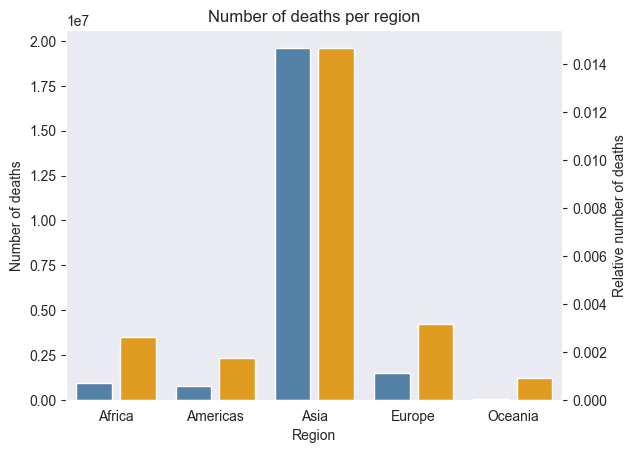

In [595]:
#sum of deaths per region
dis_region_df_sum = dis_region_df.groupby('region_name').sum(numeric_only=True)
dis_region_df_sum.reset_index(inplace=True)
dis_region_df_sum = dis_region_df_sum[['region_name', 'deaths', 'rel_deaths']]
print(dis_region_df_sum.head())

getTwinxBarPlot(dis_region_df_sum, 'region_name', 'deaths', 'rel_deaths', 'Region', 'Number of deaths per region')

This plot shows both, the number of deaths per region (blue) and the relative number of deaths per region (orange). We can see, that Asia has by far the most deaths and relative deaths. Lets take a closer look at natural disasters happened in Asia.

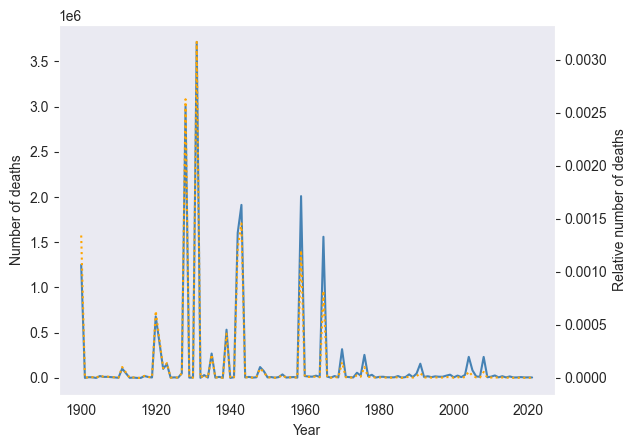

In [596]:
dis_region_asia = dis_region_df[dis_region_df['region_name'] == 'Asia']
dis_region_asia = dis_region_asia.groupby('year').sum(numeric_only=True)

#deaths and relative deaths over time
ax = sns.lineplot(data=dis_region_asia, x='year', y='deaths', color='steelblue')
ax.grid(False)
ax.set_ylabel('Number of deaths')
ax.set_xlabel('Year')

ax2 = ax.twinx()
ax2 = sns.lineplot(data=dis_region_asia, x='year', y='rel_deaths', color='orange', linestyle=':')
ax2.set_ylabel('Relative number of deaths')
ax2.grid(False)
plt.show()

This figure shows the number of deaths and relative number of deaths in Asia. Note that both y-axis are scaled to the max value. The biggest natural disaster happened in 1931. Since then, the number of deaths decreased. Due to the rapid population growth of asia, the relative death rate per disaster decreased even more. After 1965 the deaths of natural disasters sharply decreased.

### Generate Plots with absolut and relative deaths for each region

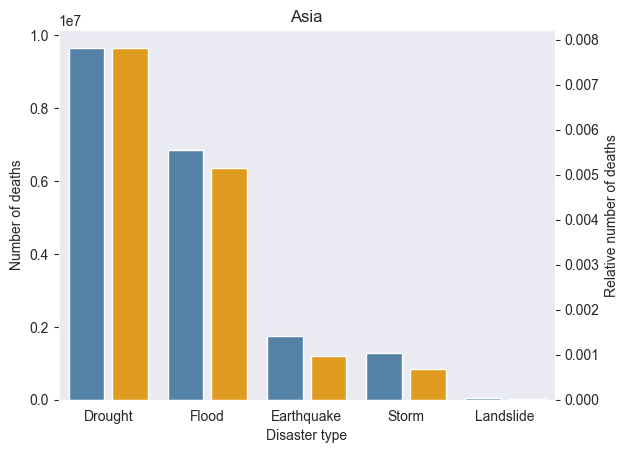

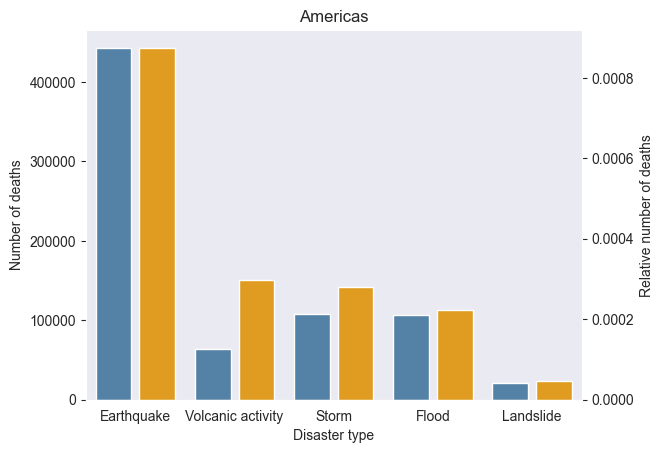

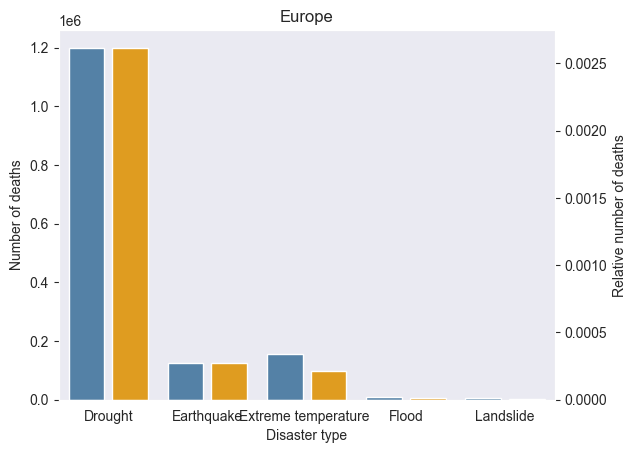

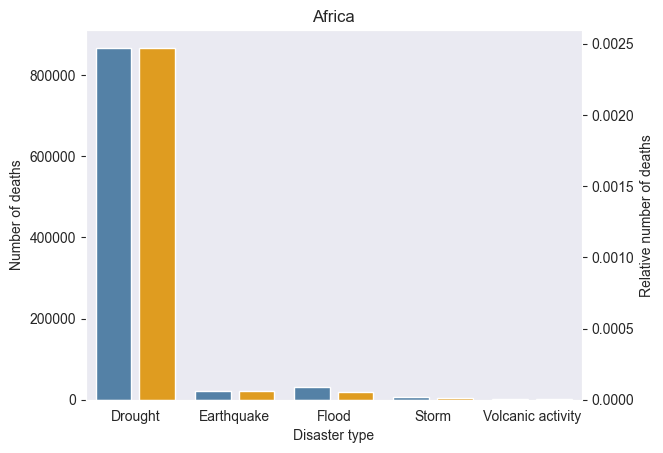

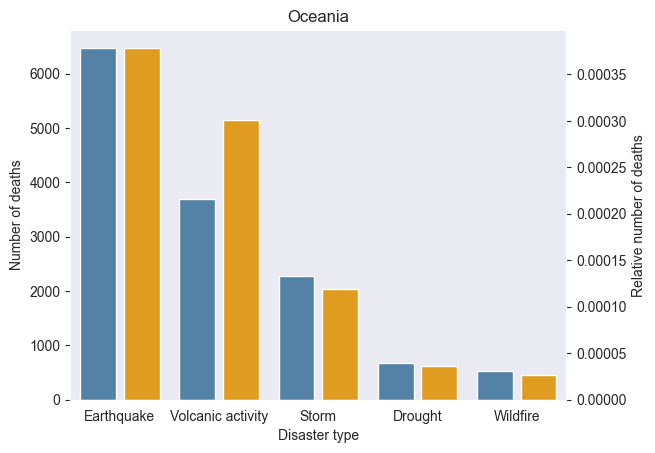

In [611]:
region_names = ['Asia', 'Americas', 'Europe', 'Africa', 'Oceania']

for region in region_names:
    dis_region_with_type = dis_region_df.loc[dis_region_df['region_name'] == region, :]
    dis_region_with_type_sum = dis_region_with_type.groupby(['region_name', 'type']).sum(numeric_only=True)
    dis_region_with_type_sum.reset_index(inplace=True)
    dis_region_with_type_sum.sort_values('rel_deaths', inplace=True, ascending=False)
    dis_region_with_type_sum = dis_region_with_type_sum.head(5)

    getTwinxBarPlot(dis_region_with_type_sum, 'type', 'deaths', 'rel_deaths', 'Disaster type', region)


##### Europe

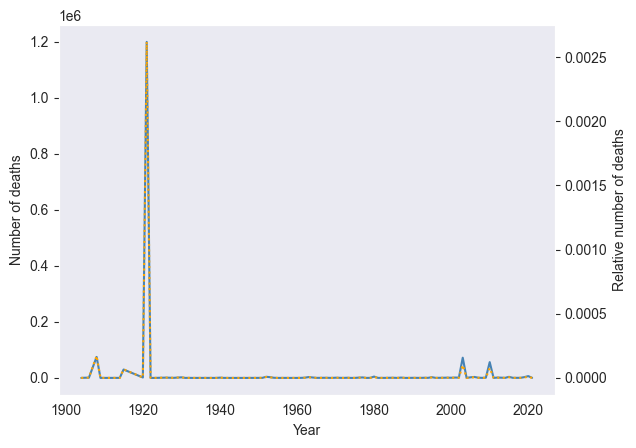

In [598]:
dis_region_europe = dis_region_df[dis_region_df['region_name'] == 'Europe']
dis_region_europe = dis_region_europe.groupby('year').sum(numeric_only=True)

#deaths and relative deaths over time
ax = sns.lineplot(data=dis_region_europe, x='year', y='deaths', color='steelblue')
ax.grid(False)
ax.set_ylabel('Number of deaths')
ax.set_xlabel('Year')

ax2 = ax.twinx()
ax2 = sns.lineplot(data=dis_region_europe, x='year', y='rel_deaths', color='orange', linestyle=':')
ax2.set_ylabel('Relative number of deaths')
ax2.grid(False)
plt.show()

#### Get deadliest countries

In [599]:
dis_country_sum = dis_country_df.groupby(['country_name', 'country_code']).sum(numeric_only=True)
dis_country_sum.reset_index(inplace=True)
dis_country_sum.sort_values('deaths', inplace=True, ascending=False)
print(dis_country_sum.head(15))

dis_country_sum.sort_values('rel_deaths', inplace=True, ascending=False)
print(dis_country_sum.head(15))

                   country_name country_code    year    deaths  rel_deaths
38                        China          CHN  175203  10960627    0.021165
85                        India          IND  170049   4591741    0.012099
14                   Bangladesh          BGD  135028   2590902    0.061324
176                Soviet Union          SUN   37231   1357423    0.000000
61                     Ethiopia          ETH   63835    404750    0.011228
80                        Haiti          HTI   87604    245431    0.027285
93                        Japan          JPN  195008    239400    0.003551
86                    Indonesia          IDN  150430    239103    0.001560
142                    Pakistan          PAK  125229    180452    0.003180
87   Iran (Islamic Republic of)          IRN  148272    163087    0.000000
179                 Sudan (the)          SDN   58167    151683    0.000000
128                     Myanmar          MMR   75504    146820    0.003333
91                       

## Countries

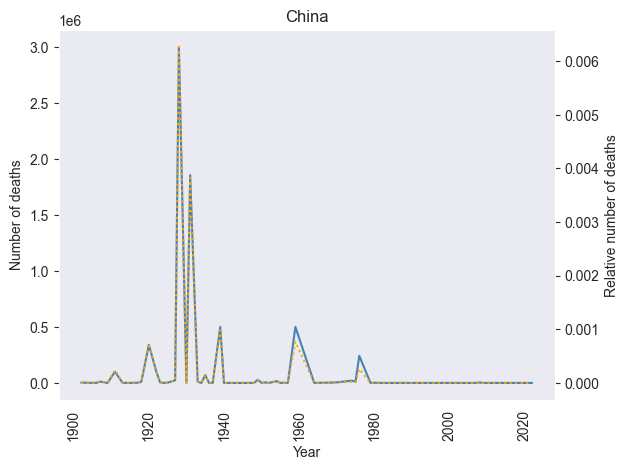

Flood


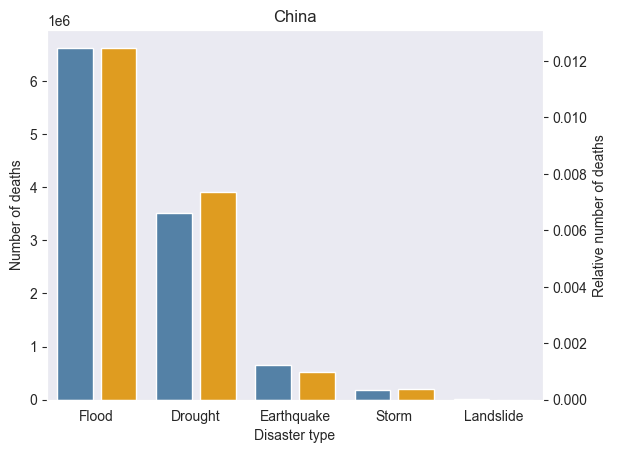

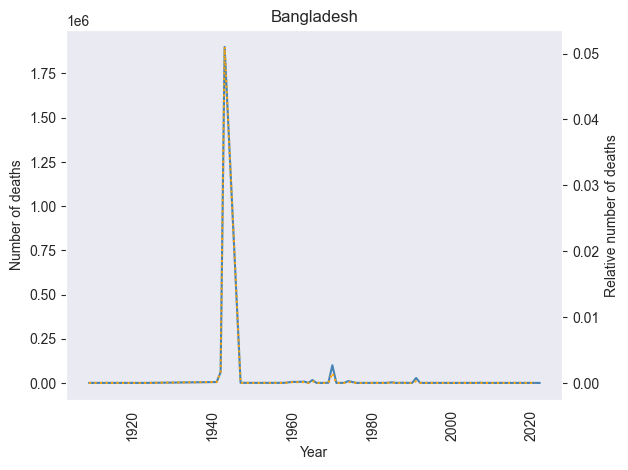

Drought


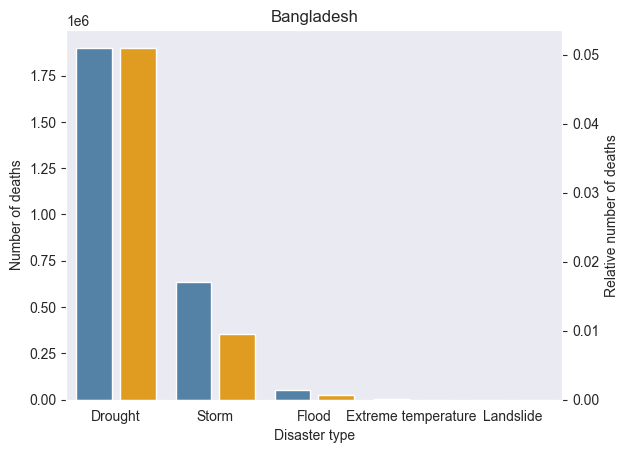

In [600]:
countries = ['China', 'Bangladesh']

for country_name in countries:
    dis_country_with_type = dis_all_with_rel_deaths.loc[dis_all_with_rel_deaths['country_name'] == country_name, ['year', 'country_name', 'deaths', 'rel_deaths', 'type', 'subtype']]

    #deaths and relative deaths over time
    ax = sns.lineplot(data=dis_country_with_type, x='year', y='deaths', color='steelblue', errorbar=None)
    ax.grid(False)
    ax.set_ylabel('Number of deaths')
    ax.set_xlabel('Year')
    ax.tick_params(axis='x', rotation=90)
    ax.set_title(country_name)

    ax2 = ax.twinx()
    ax2 = sns.lineplot(data=dis_country_with_type, x='year', y='rel_deaths', color='orange', linestyle=':', errorbar=None)
    ax2.set_ylabel('Relative number of deaths')
    ax2.grid(False)
    plt.show()

    #get deadliest disaster type
    dis_country_with_type_sum = dis_country_with_type.groupby('type').sum(numeric_only=True)
    dis_country_with_type_sum.reset_index(inplace=True)
    dis_country_with_type_sum.sort_values('rel_deaths', inplace=True, ascending=False)
    dis_country_with_type_sum = dis_country_with_type_sum.head(5)

    getTwinxBarPlot(dis_country_with_type_sum, 'type', 'deaths', 'rel_deaths', 'Disaster type', country_name)

                   country_name    deaths  rel_deaths
38                        China  10960627    0.021165
85                        India   4591741    0.012099
14                   Bangladesh   2590902    0.061324
176                Soviet Union   1357423    0.000000
61                     Ethiopia    404750    0.011228
80                        Haiti    245431    0.027285
93                        Japan    239400    0.003551
86                    Indonesia    239103    0.001560
142                    Pakistan    180452    0.003180
87   Iran (Islamic Republic of)    163087    0.000000
179                 Sudan (the)    151683    0.000000
128                     Myanmar    146820    0.003333
91                        Italy    140591    0.003610
127                  Mozambique    104094    0.008851
193                      Turkey     96483    0.004333
147                        Peru     86304    0.006726
136                 Niger (the)     85900    0.000000
29                   Cabo Ve

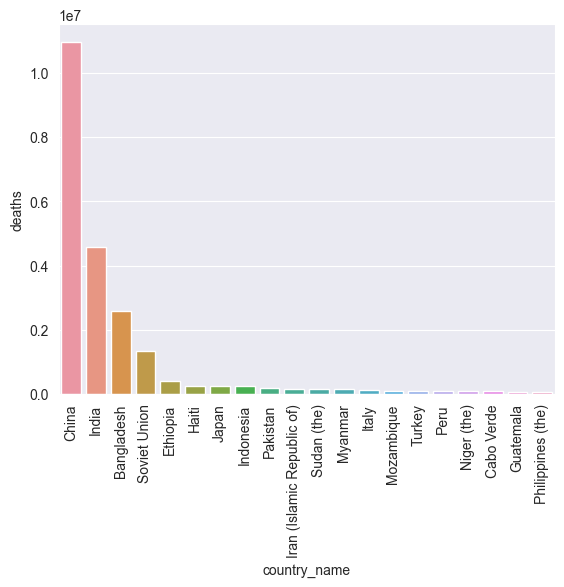

In [601]:
dis_country_sum_deaths = dis_country_df.groupby('country_name').sum('deaths')
dis_country_sum_deaths.reset_index(inplace=True)
dis_country_sum_deaths.drop('year', axis=1, inplace=True)
dis_country_sum_deaths.sort_values('deaths', inplace=True, ascending=False)
print(dis_country_sum_deaths.head(20))
dis_country_sum_deaths = dis_country_sum_deaths.iloc[0:20, :]
dis_country_sum_deaths_plot = sns.barplot(data=dis_country_sum_deaths, x=dis_country_sum_deaths['country_name'], y=dis_country_sum_deaths['deaths'])
dis_country_sum_deaths_plot.tick_params(axis='x', rotation=90)

plt.show()

          disaster type  occurrences
0               Drought           41
1            Earthquake          203
2  Extreme temperature            14
3                 Flood          314
4             Landslide           75


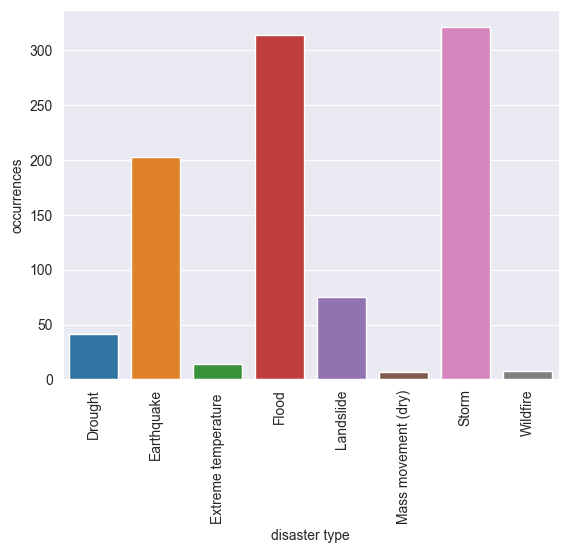

In [602]:
dis_country_china = dis_all_df[dis_all_df['country_name'] == 'China']

#pre processing
dis_country_china_by_type = dis_country_china.groupby('type').count()
dis_country_china_by_type.reset_index(inplace=True)
dis_country_china_by_type = dis_country_china_by_type.loc[:, ['type', 'year']]
dis_country_china_by_type.rename(columns={'year': 'occurrences', 'type': 'disaster type'}, inplace=True)
print(dis_country_china_by_type.head())

#plot
dis_country_china_by_type_plot = sns.barplot(data=dis_country_china_by_type, x=dis_country_china_by_type['disaster type'], y='occurrences')
dis_country_china_by_type_plot.tick_params(axis='x', rotation=90)
plt.show()

In [603]:
dis_country_china_storm = dis_country_china.loc[dis_country_china['type'] == 'Storm', :]
dis_country_china_storm = dis_country_china_storm.groupby('subtype').count()
print(dis_country_china_storm.head())

                     year  dis_no  country_name  country_code  location  \
subtype                                                                   
Convective storm      110     110           110           110       109   
Tropical cyclone      169     169           169           169       159   
Uncategorized_Storm    42      42            42            42        41   

                     subgroup  type  deaths  dis_mag_value  dis_mag_scale  \
subtype                                                                     
Convective storm          110   110     110              6            110   
Tropical cyclone          169   169     169             49            169   
Uncategorized_Storm        42    42      42              2             42   

                     start_year  end_year  region_name  region_code  
subtype                                                              
Convective storm            110       110          110          110  
Tropical cyclone            